In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
voice_df = pd.read_csv('./voice.csv/voice.csv')
voice_df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [3]:
voice_df.isnull().sum()


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [4]:
corr = voice_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [5]:
#We see some of the variables are highly correlated
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = voice_df.iloc[:,:-1]
y = voice_df.iloc[:,-1]


scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

male_female = LabelEncoder()
y = male_female.fit_transform(y)

Text(0, 0.5, 'Count')

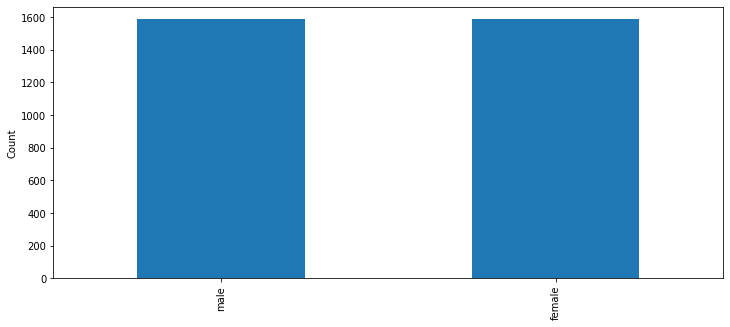

In [39]:
voice_df['label'].value_counts().plot(kind='bar',figsize = (12,5))

plt.ylabel('Count')

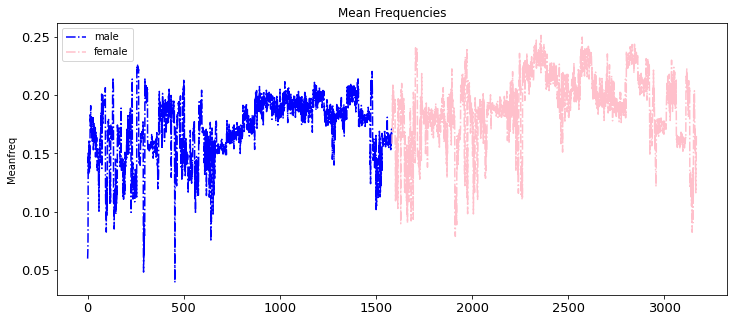

In [31]:
Male_df = voice_df.loc[voice_df.label == "male"]
Female_df = voice_df.loc[voice_df.label == "female"]

Male_df['meanfreq'].plot(kind='line', figsize=(12,5), color='blue', fontsize=13, linestyle='-.', label='male')
Female_df['meanfreq'].plot(kind='line', figsize=(12,5), color='pink', fontsize=13, linestyle='-.', label='female')
plt.ylabel('Meanfreq')
plt.title('Mean Frequencies')
plt.legend()
plt.show()

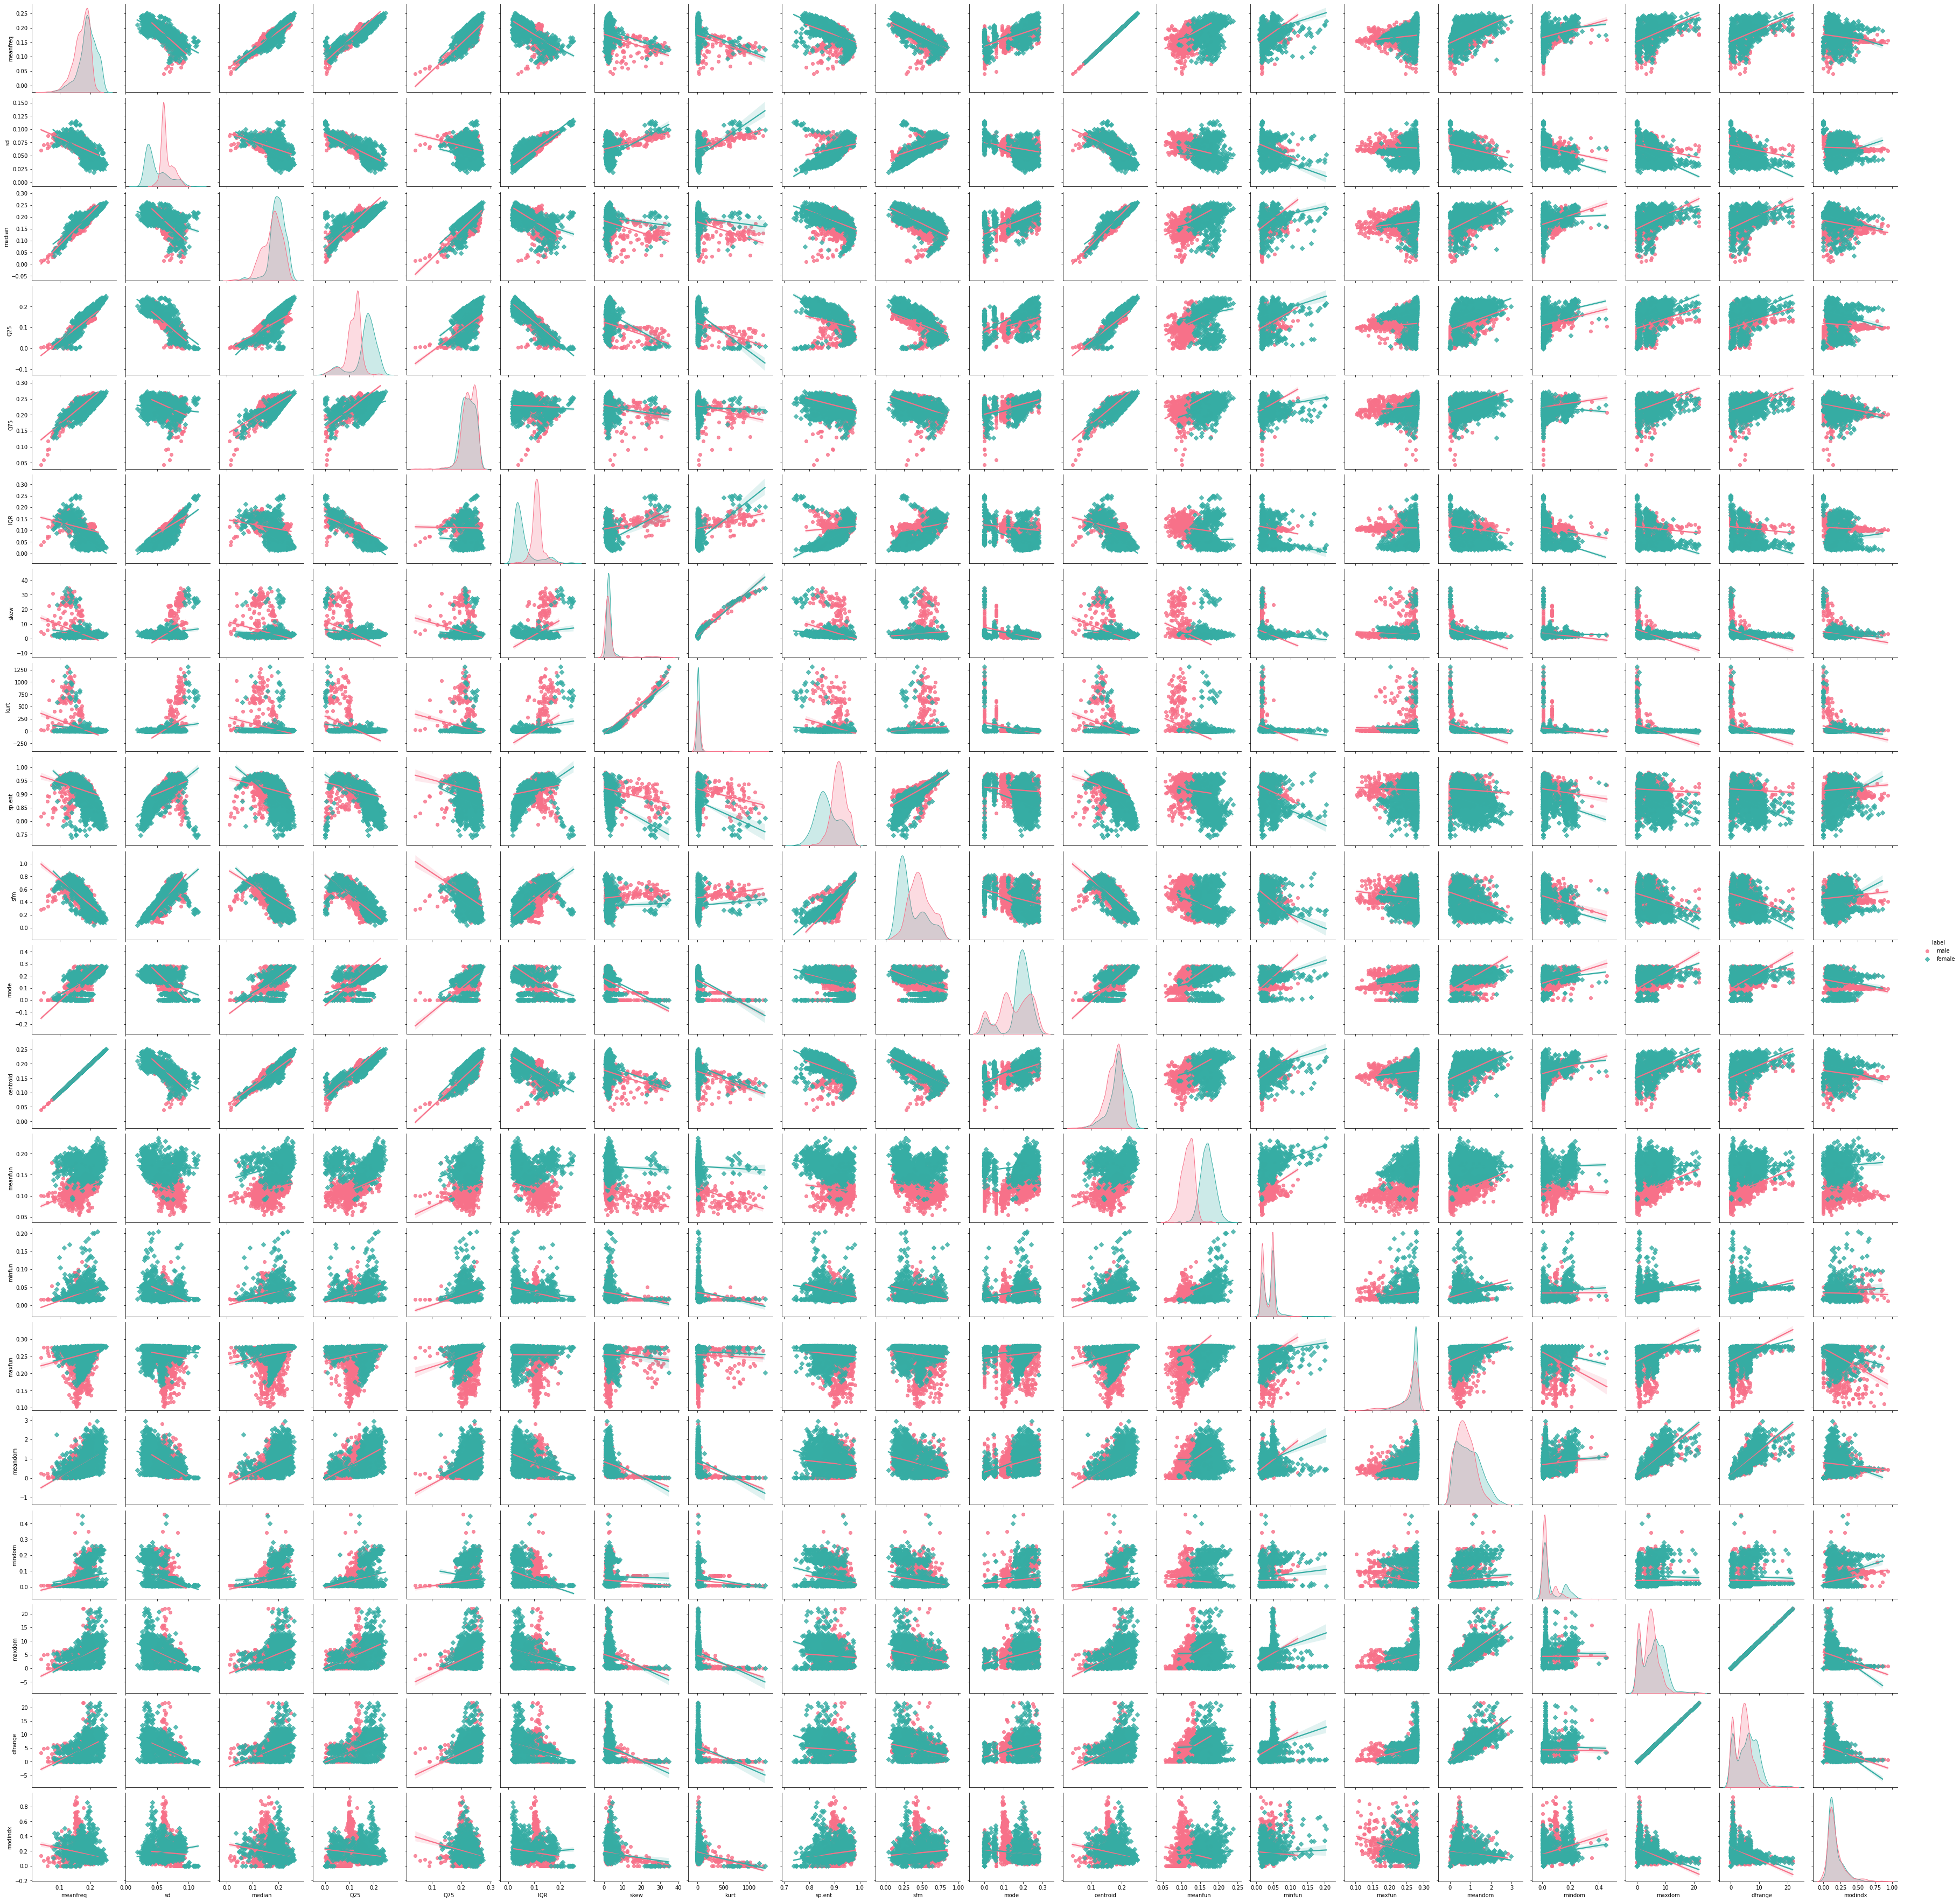

In [32]:
import seaborn as sns

sns.pairplot(voice_df, diag_kind="kde"
             , kind="reg", hue="label", markers=["o","D"],palette="husl")

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_kbest_clf(data_frame, target, k=5):
    
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores
k=select_kbest_clf(voice_df, 'label', k=5).sort_values(['F Score'],ascending=False)

k


F Score        P Value  Support Attribute
12  7228.790362   0.000000e+00     True   meanfun
5   1965.750000   0.000000e+00     True       IQR
3   1121.569224  9.140832e-211     True       Q25
8   1003.308717  1.614016e-191     True    sp.ent
1    945.461376  6.654756e-182     True        sd
9    463.923194   3.877715e-96    False       sfm
0    406.752820   3.368951e-85    False  meanfreq
11   406.752820   3.368951e-85    False  centroid
2    277.588158   8.259210e-60    False    median
17   126.024161   1.050986e-28    False    maxdom
16   125.110999   1.636130e-28    False    mindom
18   121.457858   9.626061e-28    False   dfrange
15   119.959108   1.992966e-27    False   meandom
10    96.257909   2.097044e-22    False      mode
14    90.228036   4.044625e-21    False    maxfun
13    60.282137   1.101400e-14    False    minfun
7     24.255365   8.869557e-07    False      kurt
4     14.236082   1.642021e-04    False       Q75
6      4.252980   3.926293e-02    False      skew
19     3.006445   8.303136e-02    False   modindx

Text(0.5, 1.0, 'Feature Importance')

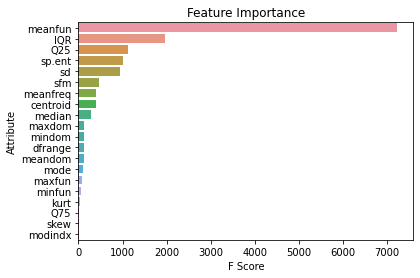

In [35]:
k1=sns.barplot(x=k['F Score'],y=k['Attribute'])
k1.set_title('Feature Importance')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9842271293375394


In [8]:
class SVM_Scratch:
    def __init__(self, learning_rate = 0.01, lamda = 0.01, epochs = 1000):
        self.w, self.b = None, None
        self.dw, self.db = 0.0, 0.0
        self.learning_rate = learning_rate
        self.lamda = lamda
        self.epochs = epochs


    def gradient_step(self):
        self.w -= self.learning_rate * self.dw
        self.b -= self.learning_rate * self.db
        self.no_grad()


    def no_grad(self):
        self.dw, self.db = 0.0, 0.0


    def train(self, X, Y):
        
        datapoints, features = np.shape(X)
        self.w = np.random.random(features)
        self.b = np.random.random()
        
        Y_ = np.where(Y<= 0,-1,1) # We need to make sure we have the responses as [-1,1]
        
        for epoch in range(1, self.epochs+1):
            loss = 0
            for idx, pt in enumerate(X):
                cond = 1 - Y_[idx] * (np.dot(pt, self.w) + self.b)
                loss += max(0, cond)

                if cond > 0:
                    self.dw += -1* np.dot(Y_[idx], pt)
                    self.db += -1* Y_[idx]

                
            self.dw /= datapoints
            self.db /= datapoints
            self.dw += self.lamda * 2 * self.w
            self.gradient_step()
        
            total_loss = loss/datapoints + self.lamda * np.linalg.norm(self.w, ord=2)
            if epoch%50==0:
                print('Total loss after epoch: {} is loss: {}'.format(epoch, total_loss))
            

    
    def predict(self, X):
        output = np.dot(X, self.w) +self.b
        return np.sign(output)
    
    def score(self, X, Y):
        y_hat = self.predict(X)
        y_correct = np.sum(y_hat == Y)
        accuracy = y_correct/np.shape(Y)[-1]
        return accuracy 

    
    def visualize(self):
        pass
    


In [40]:
scratch_svm = SVM_Scratch()
scratch_svm.train(X_train, y_train)
accuracy = scratch_svm.score(X_test,y_test)
print("Accuracy for in-house scratch model is: {}".format(accuracy))


Total loss after epoch: 50 is loss: 0.7823729535322278
Total loss after epoch: 100 is loss: 0.5680084894746025
Total loss after epoch: 150 is loss: 0.4940894619721652
Total loss after epoch: 200 is loss: 0.43840065572567166
Total loss after epoch: 250 is loss: 0.3910083926553393
Total loss after epoch: 300 is loss: 0.3495060969457637
Total loss after epoch: 350 is loss: 0.3124404065901907
Total loss after epoch: 400 is loss: 0.2806960633877995
Total loss after epoch: 450 is loss: 0.25342969453851916
Total loss after epoch: 500 is loss: 0.2306811986891477
Total loss after epoch: 550 is loss: 0.21081000342602094
Total loss after epoch: 600 is loss: 0.19375709685262735
Total loss after epoch: 650 is loss: 0.17914795965202393
Total loss after epoch: 700 is loss: 0.16787549668177731
Total loss after epoch: 750 is loss: 0.1593305794730676
Total loss after epoch: 800 is loss: 0.15242802800356006
Total loss after epoch: 850 is loss: 0.1466262211314635
Total loss after epoch: 900 is loss: 0.142

In [71]:
#Default Kernel

svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.973186119873817


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       301
           1       0.96      0.98      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



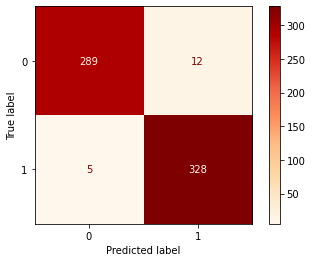

In [72]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
plot_confusion_matrix(svc, X_test, y_test, cmap='OrRd')  

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

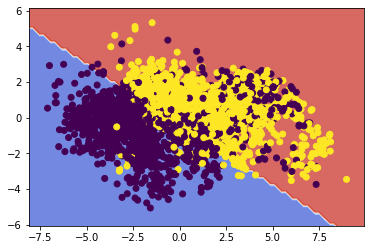

In [49]:
from sklearn.decomposition import PCA

# initialize algorithms and data with random
model = SVC(kernel='linear')
pca = PCA(n_components = 2)
pca.fit(X_train,y_train)
U2 = pca.fit_transform(X_train,y_train)
model.fit(U2,y_train)

# generate grid for plotting
h = 0.2
x_min, x_max = U2[:,0].min() - 1, U2[:, 0].max() + 1
y_min, y_max = U2[:,1].min() - 1, U2[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

# create decision boundary plot
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(U2[:,0],U2[:,1],c=y_train)
plt.show()

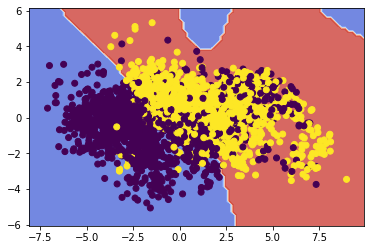

In [50]:
model = SVC(kernel='rbf')
pca = PCA(n_components = 2)
pca.fit(X_train,y_train)
U2 = pca.fit_transform(X_train,y_train)
model.fit(U2,y_train)

# generate grid for plotting
h = 0.2
x_min, x_max = U2[:,0].min() - 1, U2[:, 0].max() + 1
y_min, y_max = U2[:,1].min() - 1, U2[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

# create decision boundary plot
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(U2[:,0],U2[:,1],c=y_train)
plt.show()

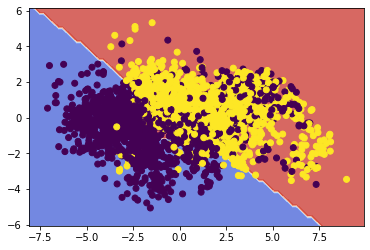

In [53]:
model = SVC(kernel='poly')
pca = PCA(n_components = 2)
pca.fit(X_train,y_train)
U2 = pca.fit_transform(X_train,y_train)
model.fit(U2,y_train)

# generate grid for plotting
h = 0.2
x_min, x_max = U2[:,0].min() - 1, U2[:, 0].max() + 1
y_min, y_max = U2[:,1].min() - 1, U2[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

# create decision boundary plot
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(U2[:,0],U2[:,1],c=y_train)
plt.show()

In [73]:
# RBF Kernel 

svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9842271293375394


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       301
           1       0.99      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



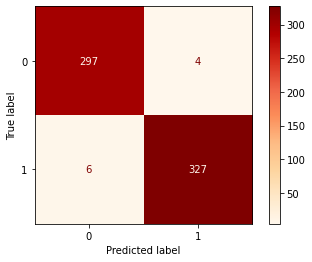

In [74]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
plot_confusion_matrix(svc, X_test, y_test, cmap='OrRd')
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))  

In [75]:
# Poly Kernel

svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9589905362776026


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       301
           1       0.94      0.98      0.96       333

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



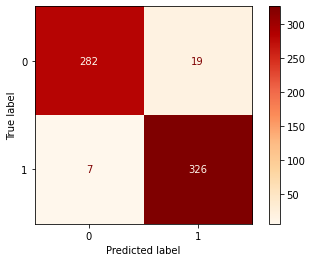

In [76]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
plot_confusion_matrix(svc, X_test, y_test, cmap='OrRd')  
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

In [13]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.91167192 0.97160883 0.97160883 0.97791798 0.95899054 0.9873817
 0.99369085 0.97791798 0.95253165 0.99367089]


In [14]:
print(scores.mean())

0.9696991175178692


In [15]:
### RBF

svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)



[0.93375394 0.95583596 0.96845426 0.96214511 0.96529968 0.99684543
 0.99053628 0.98422713 0.91455696 0.99367089]


In [16]:
print(scores.mean())

0.9665325639899376


In [17]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.89274448 0.94952681 0.93059937 0.92744479 0.94952681 0.99369085
 0.98422713 0.96529968 0.87974684 0.9778481 ]


In [18]:
print(scores.mean())

0.9450654873617378


In [56]:
'''
Taking all the values of C and checking out the accuracy score with kernel as linear.
The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well
'''


C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.9450654873617378, 0.9485415086051991, 0.9498053348241026, 0.9513856167392085, 0.9517000758695046, 0.9520165315657071, 0.9526474463922054, 0.9542247334584516, 0.9542247334584516, 0.9545401908717007, 0.9539092760452024, 0.9542247334584516, 0.9548566465679033, 0.9548566465679033, 0.9551741005470591, 0.9551750988300125, 0.9554905562432617, 0.9561214710697602, 0.9558060136565109, 0.9558060136565109, 0.9567523858962586, 0.9564359302000559, 0.9564359302000559, 0.9561194745038535, 0.9564339336341494]


Text(0, 0.5, 'Cross-Validated Accuracy')

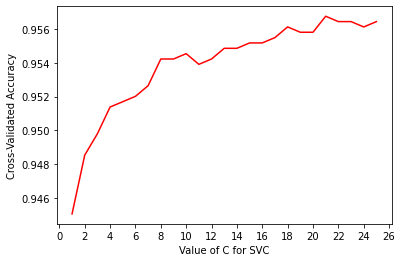

In [57]:
C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score, color = 'r')
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [21]:
'''
Accuracy is maximum for C = 1 and then reduces. But for a value of C  = 5 we get decent accuracy
'''

'\nAccuracy is maximum for C = 1 and then reduces. But for a value of C  = 5 we get decent accuracy\n'

In [62]:
'''ArithmeticError

Taking kernel as rbf and taking different values gamma
Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. 
Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. 
In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other

'''

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='poly', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.49842171465080065, 0.49842171465080065, 0.830189074791359, 0.9539092760452024, 0.945383939623847, 0.945383939623847, 0.945383939623847]


Text(0, 0.5, 'Cross-Validated Accuracy')

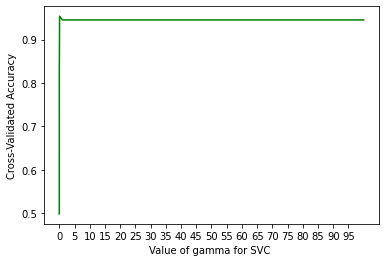

In [63]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score, color = 'g')
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [24]:
'''ArithmeticError


The score increases steadily and raches its peak at 0.01 and then decreases till gamma=1.Thus Gamma should be around 0.01.

'''

'ArithmeticError\n\n\nThe score increases steadily and raches its peak at 0.01 and then decreases till gamma=1.Thus Gamma should be around 0.01.\n\n'

In [25]:
" POLYNOMIAL WITH DIFFERENT DEGREES"


degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.8515842750469194, 0.9450654873617378, 0.8313989937307829, 0.8661622010142555, 0.7736463283152977]


Text(0, 0.5, 'Cross-Validated Accuracy')

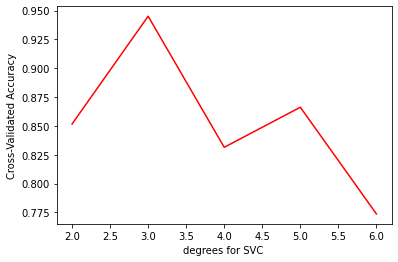

In [26]:
degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [27]:
'''

Score is high for third degree polynomial and then there is drop in the accuracy score as degree of polynomial increases.Thus increase in polynomial degree results in high complexity of the model and thus causes overfitting.

'''

'\n\nScore is high for third degree polynomial and then there is drop in the accuracy score as degree of polynomial increases.Thus increase in polynomial degree results in high complexity of the model and thus causes overfitting.\n\n'

In [28]:
'''
Let us perform Grid search technique to find the best parameter
'''
import numpy as np 
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [29]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

KeyboardInterrupt: 

: 